In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
names_hTERT = [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]

names_PDL = [
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [9]:
dataset = pd.read_csv('Ranked.tsv',sep='\t')
dataset.head(10)

chrom    start      end  hTERT-TP2-R1  hTERT-TP4-R1-1  hTERT-TP4-R1-2  \
0  chr1        0   250000           NaN             NaN             NaN   
1  chr1   250000   500000           NaN             NaN             NaN   
2  chr1   500000   750000           NaN             NaN             NaN   
3  chr1   750000  1000000           NaN             NaN             5.0   
4  chr1  1000000  1250000           1.0             2.0             4.0   
5  chr1  1250000  1500000           NaN             4.0             3.0   
6  chr1  1500000  1750000           NaN             1.0             6.0   
7  chr1  1750000  2000000           6.0            41.0            43.0   
8  chr1  2000000  2250000         400.0           960.0           815.0   
9  chr1  2250000  2500000        2430.0          2130.0          2003.0   

   hTERT-TP5-R1  hTERT-TP6-R1  PDL25-TP2-R1  PDL33-TP4-R1  PDL37-TP5-R1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN          37.0           NaN           NaN   
4           1.0           2.0           4.0           2.0           2.0   
5           NaN           NaN           3.0           3.0           NaN   
6           NaN           NaN           1.0           NaN           NaN   
7          19.0          72.0          61.0          15.0          34.0   
8         683.0        3227.0         574.0         248.0          90.0   
9        2065.0        3271.0        1621.0        2120.0        1844.0   

   PDL46-TP6-R1  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7          10.0  
8          85.0  
9        1294.0

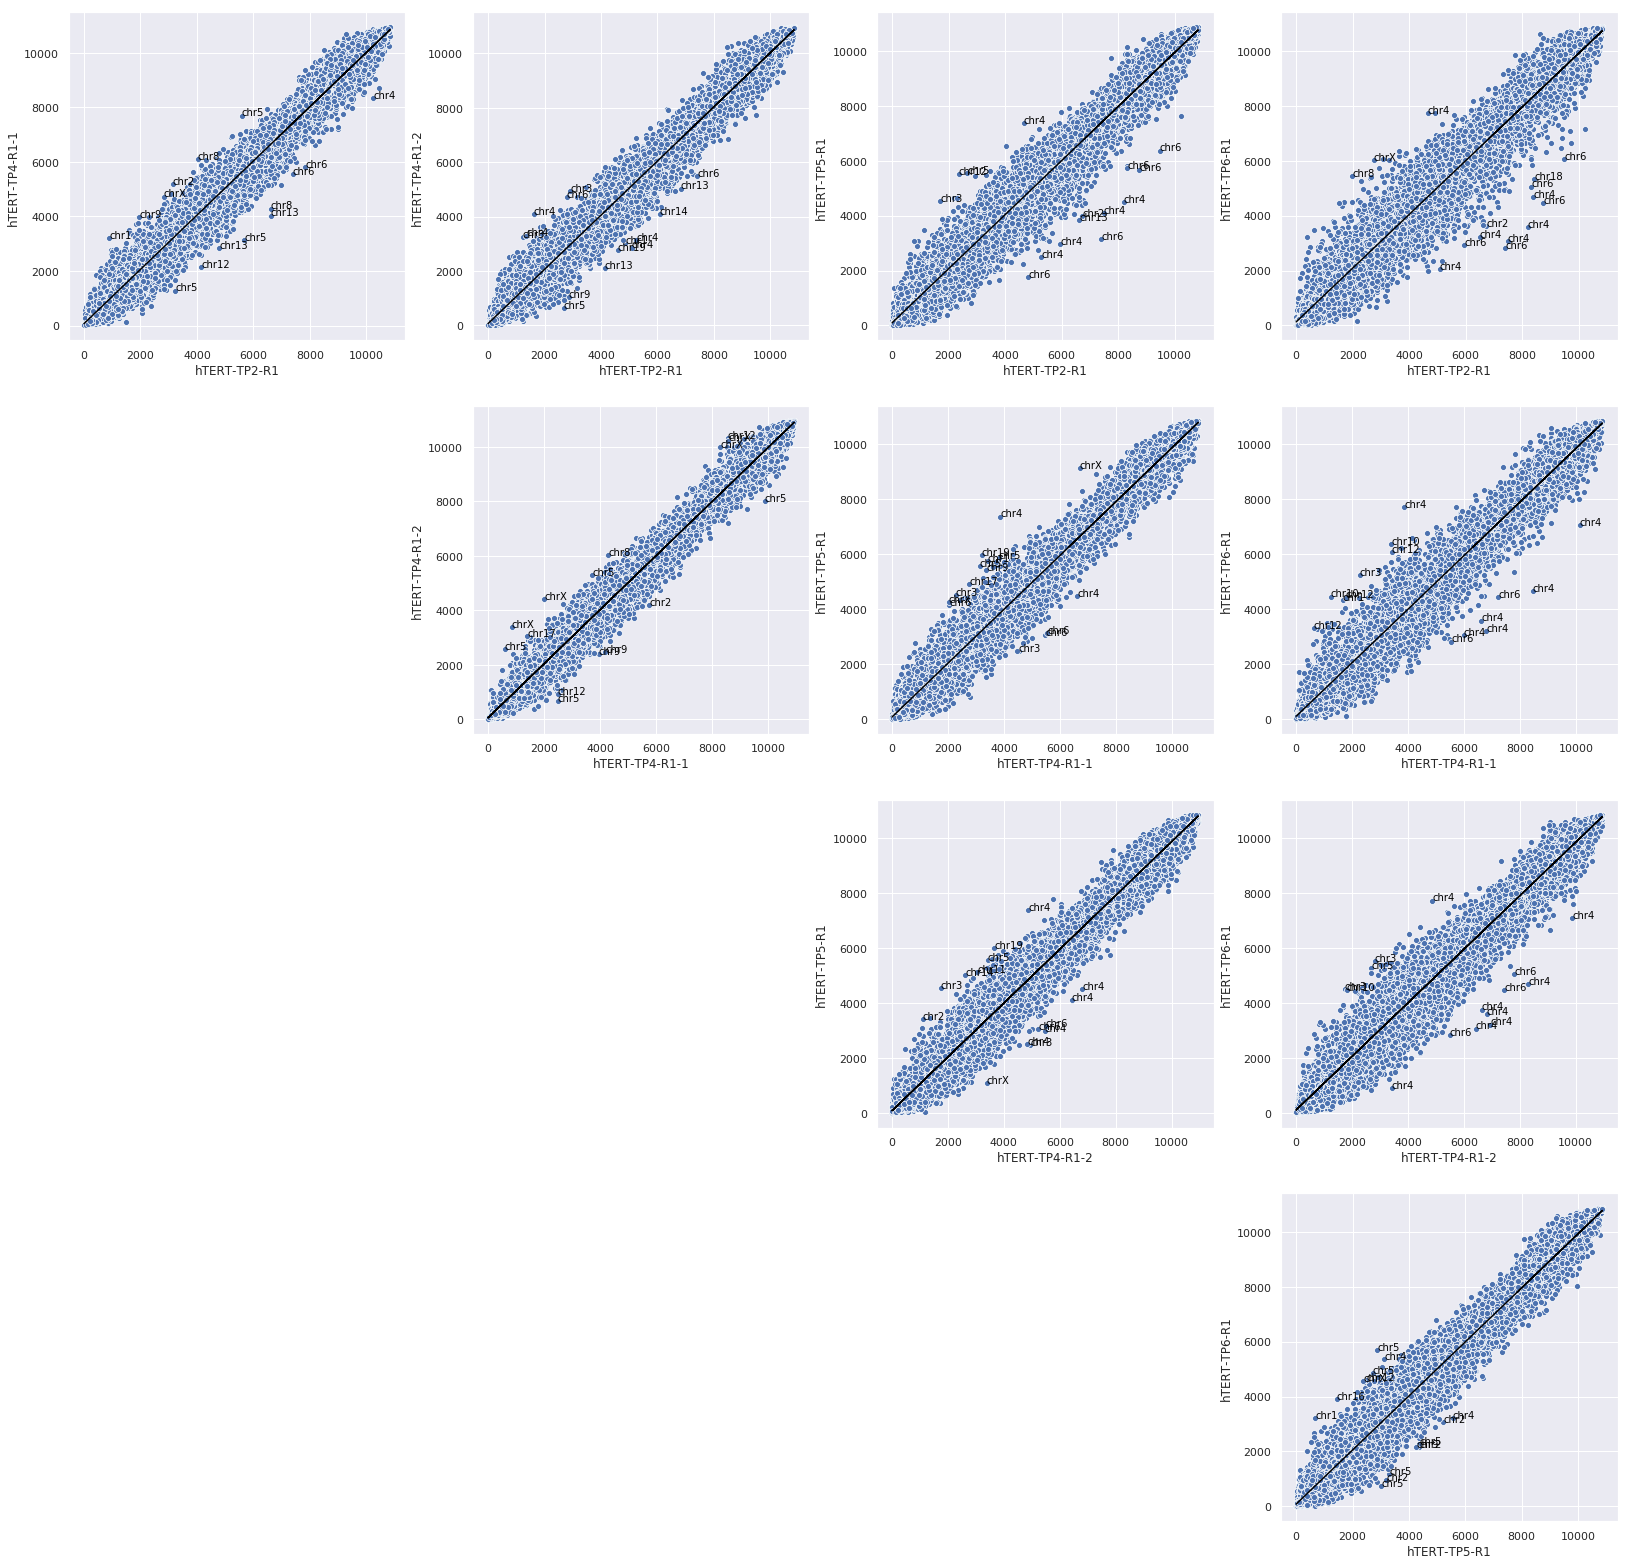

In [108]:
#hTERTS
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=5, ncols=5)
for i in range(5):
    for j in range(i+1,5):
        #linear reg
        regressor = LinearRegression()
        df=dataset[['chrom','start','end',names_hTERT[i],names_hTERT[j]]].dropna()
        X=df[names_hTERT[i]].values.reshape(-1,1)
        y=df[names_hTERT[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        #calculatin perpendicular distances
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c #predicted y values
        #sorteddf.to_csv(names_hTERT[i]+names_hTERT[j]+'.tsv',index=False,sep='\t')
        
        #plotting
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[i],y=names_hTERT[j],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

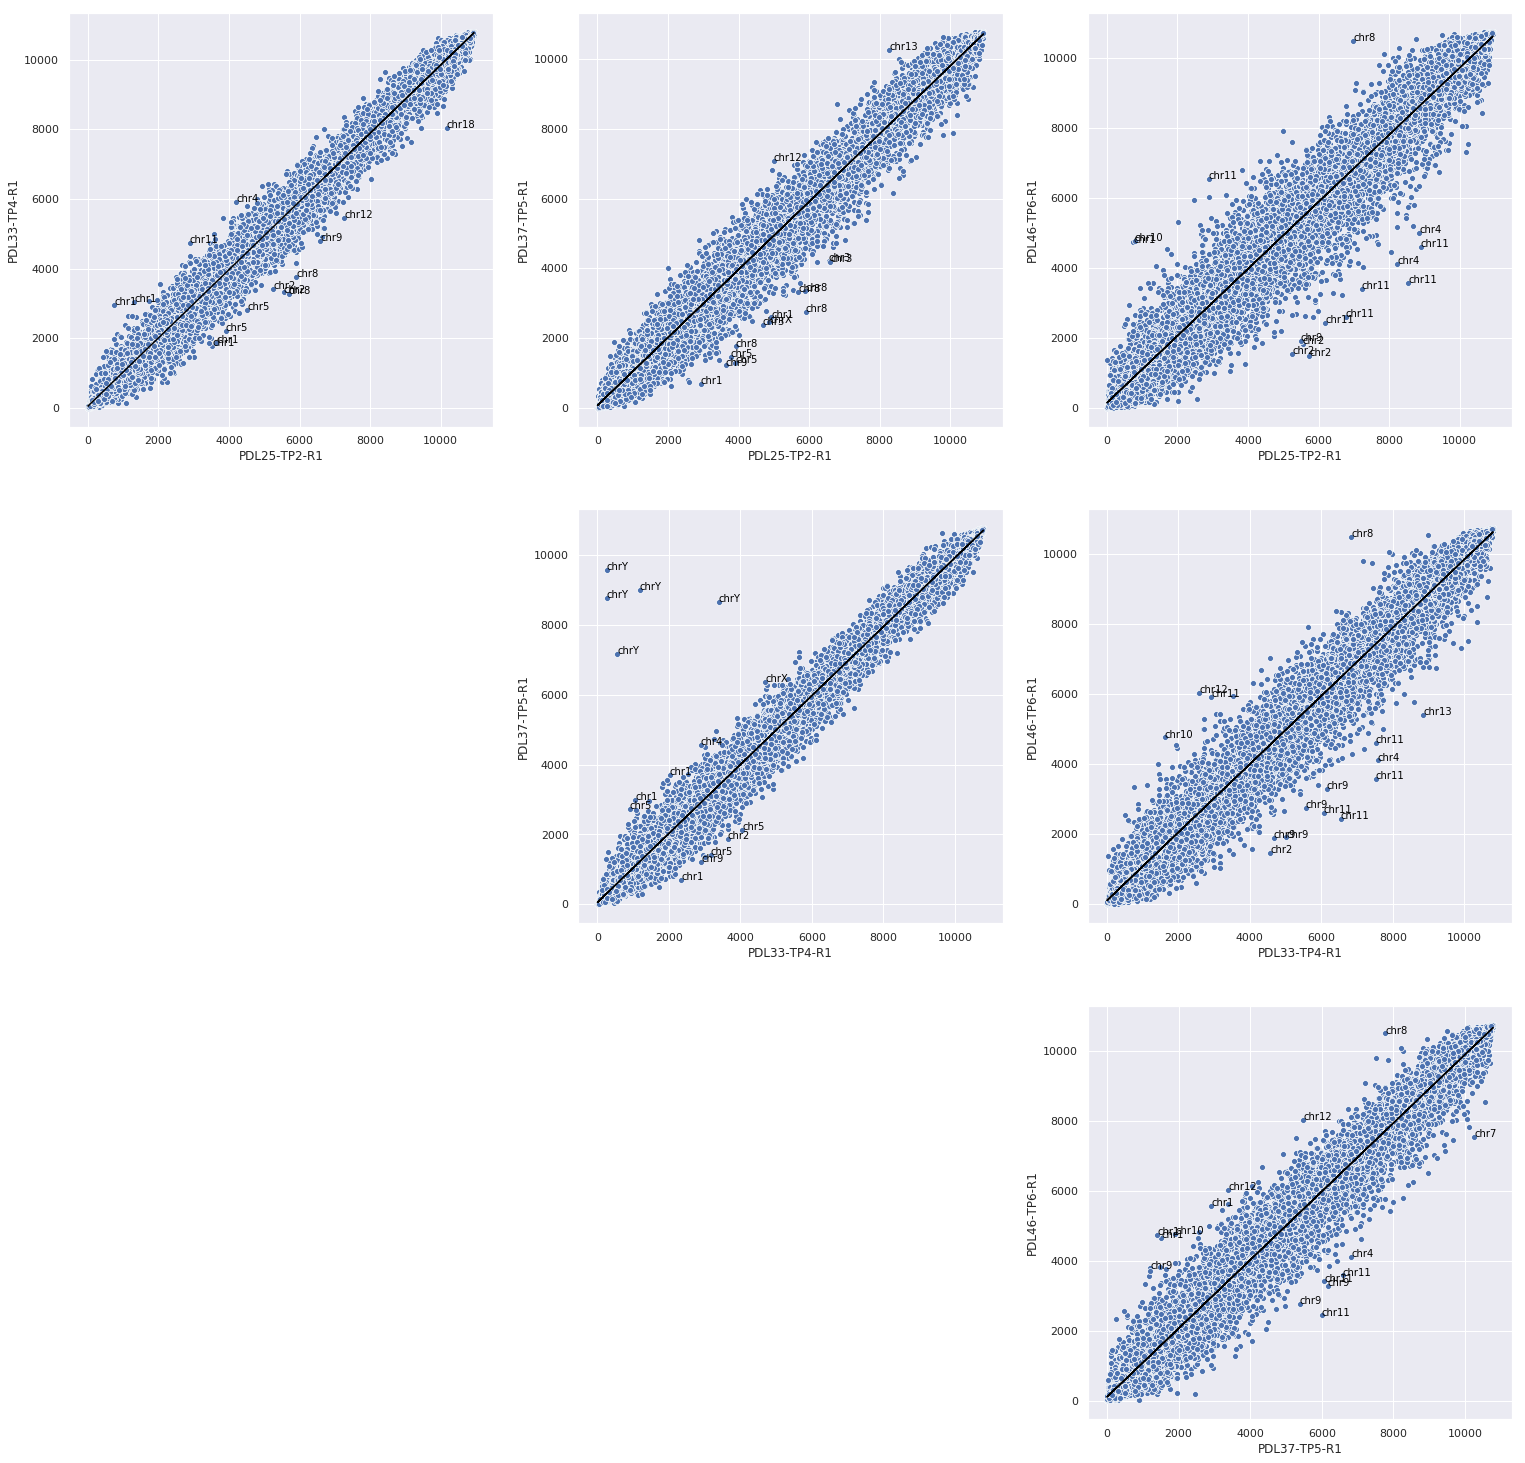

In [109]:
#PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=4)
for i in range(4):
    for j in range(i+1,4):
        df=dataset[['chrom','start','end',names_PDL[i],names_PDL[j]]].dropna()
        X=df[names_PDL[i]].values.reshape(-1,1)
        y=df[names_PDL[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        #sorteddf.to_csv(names_PDL[i]+names_PDL[j]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_PDL[i],y=names_PDL[j],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

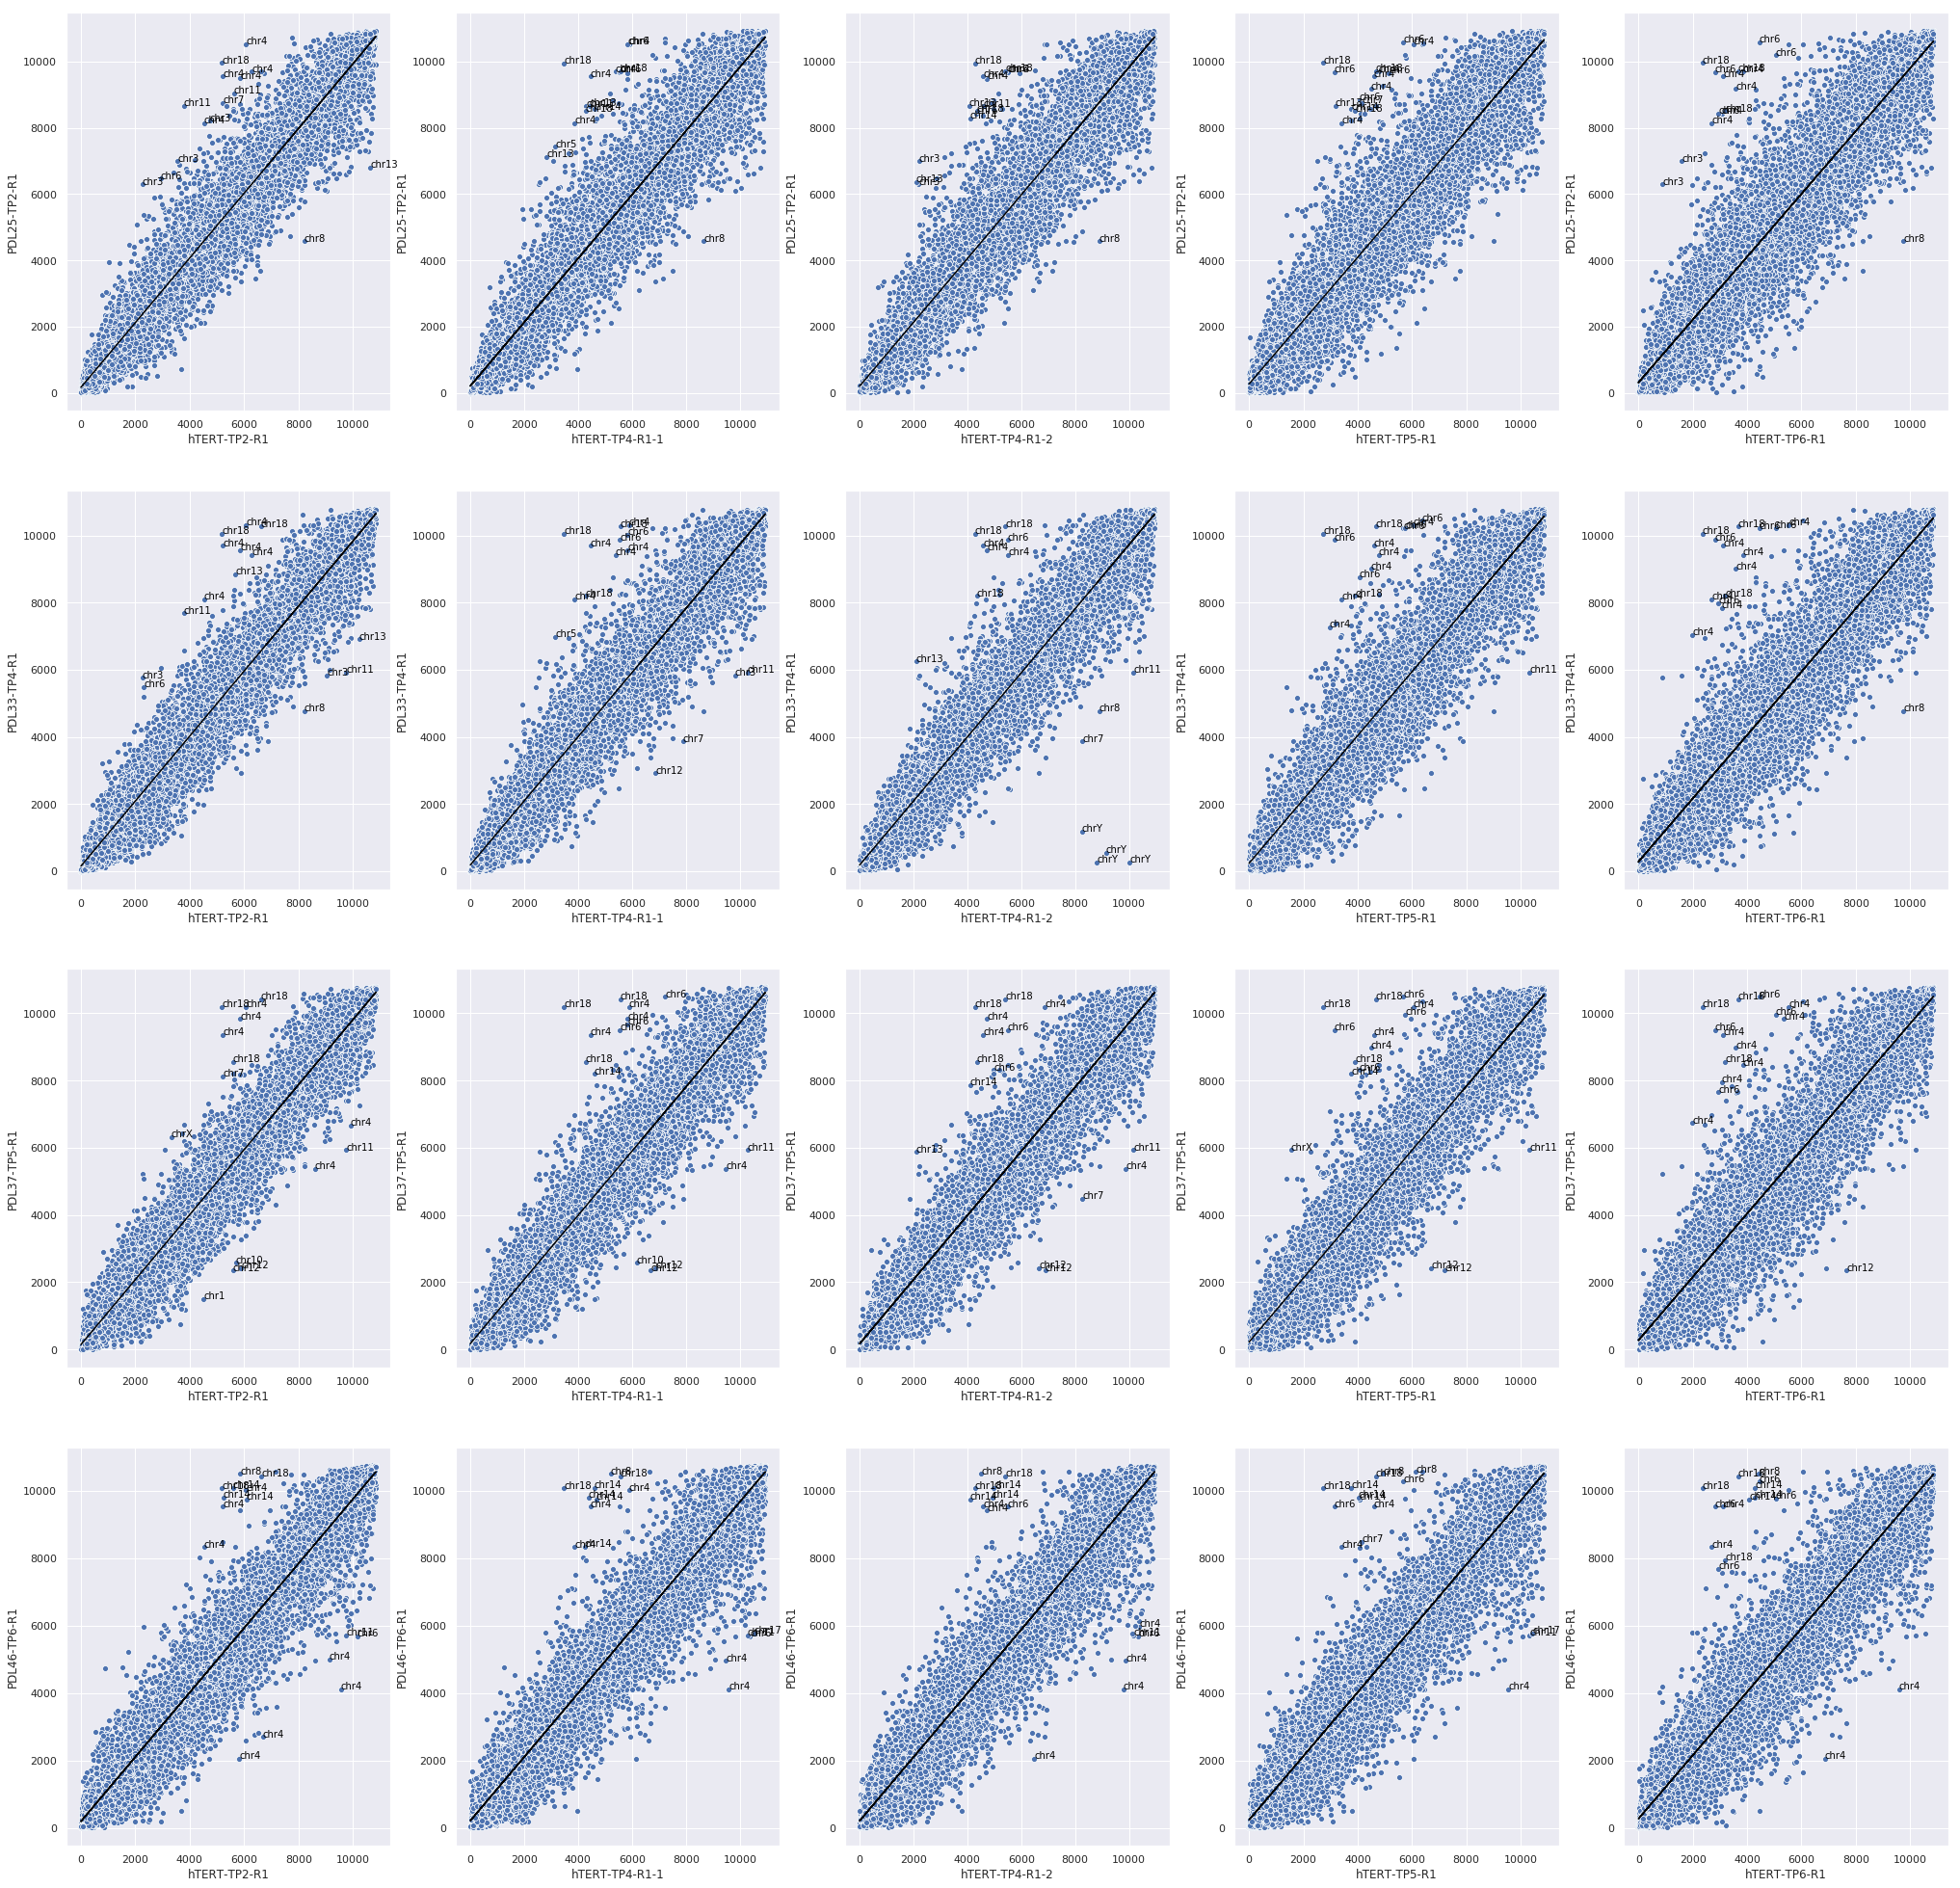

In [110]:
#hTERT-PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=5)
for i in range(4):
    for j in range(5):
        df=dataset[['chrom','start','end',names_hTERT[j],names_PDL[i]]].dropna()
        X=df[names_hTERT[j]].values.reshape(-1,1)
        y=df[names_PDL[i]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        #sorteddf.to_csv(names_hTERT[j]+names_PDL[i]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i,j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[j],y=names_PDL[i],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

Original Data 

In [111]:
data1 = pd.read_csv('Original.tsv',sep='\t')
data1.head()

chrom    start      end  hTERT-TP2-R1  hTERT-TP4-R1-1  hTERT-TP4-R1-2  \
0  chr1        0   250000           NaN             NaN             NaN   
1  chr1   250000   500000           NaN             NaN             NaN   
2  chr1   500000   750000           NaN             NaN             NaN   
3  chr1   750000  1000000           NaN             NaN       -1.257441   
4  chr1  1000000  1250000     -1.511687       -1.389236       -1.293709   

   hTERT-TP5-R1  hTERT-TP6-R1  PDL25-TP2-R1  PDL33-TP4-R1  PDL37-TP5-R1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN     -1.307887           NaN           NaN   
4     -1.209282     -1.234787     -1.649242     -1.512266     -1.402866   

   PDL46-TP6-R1  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

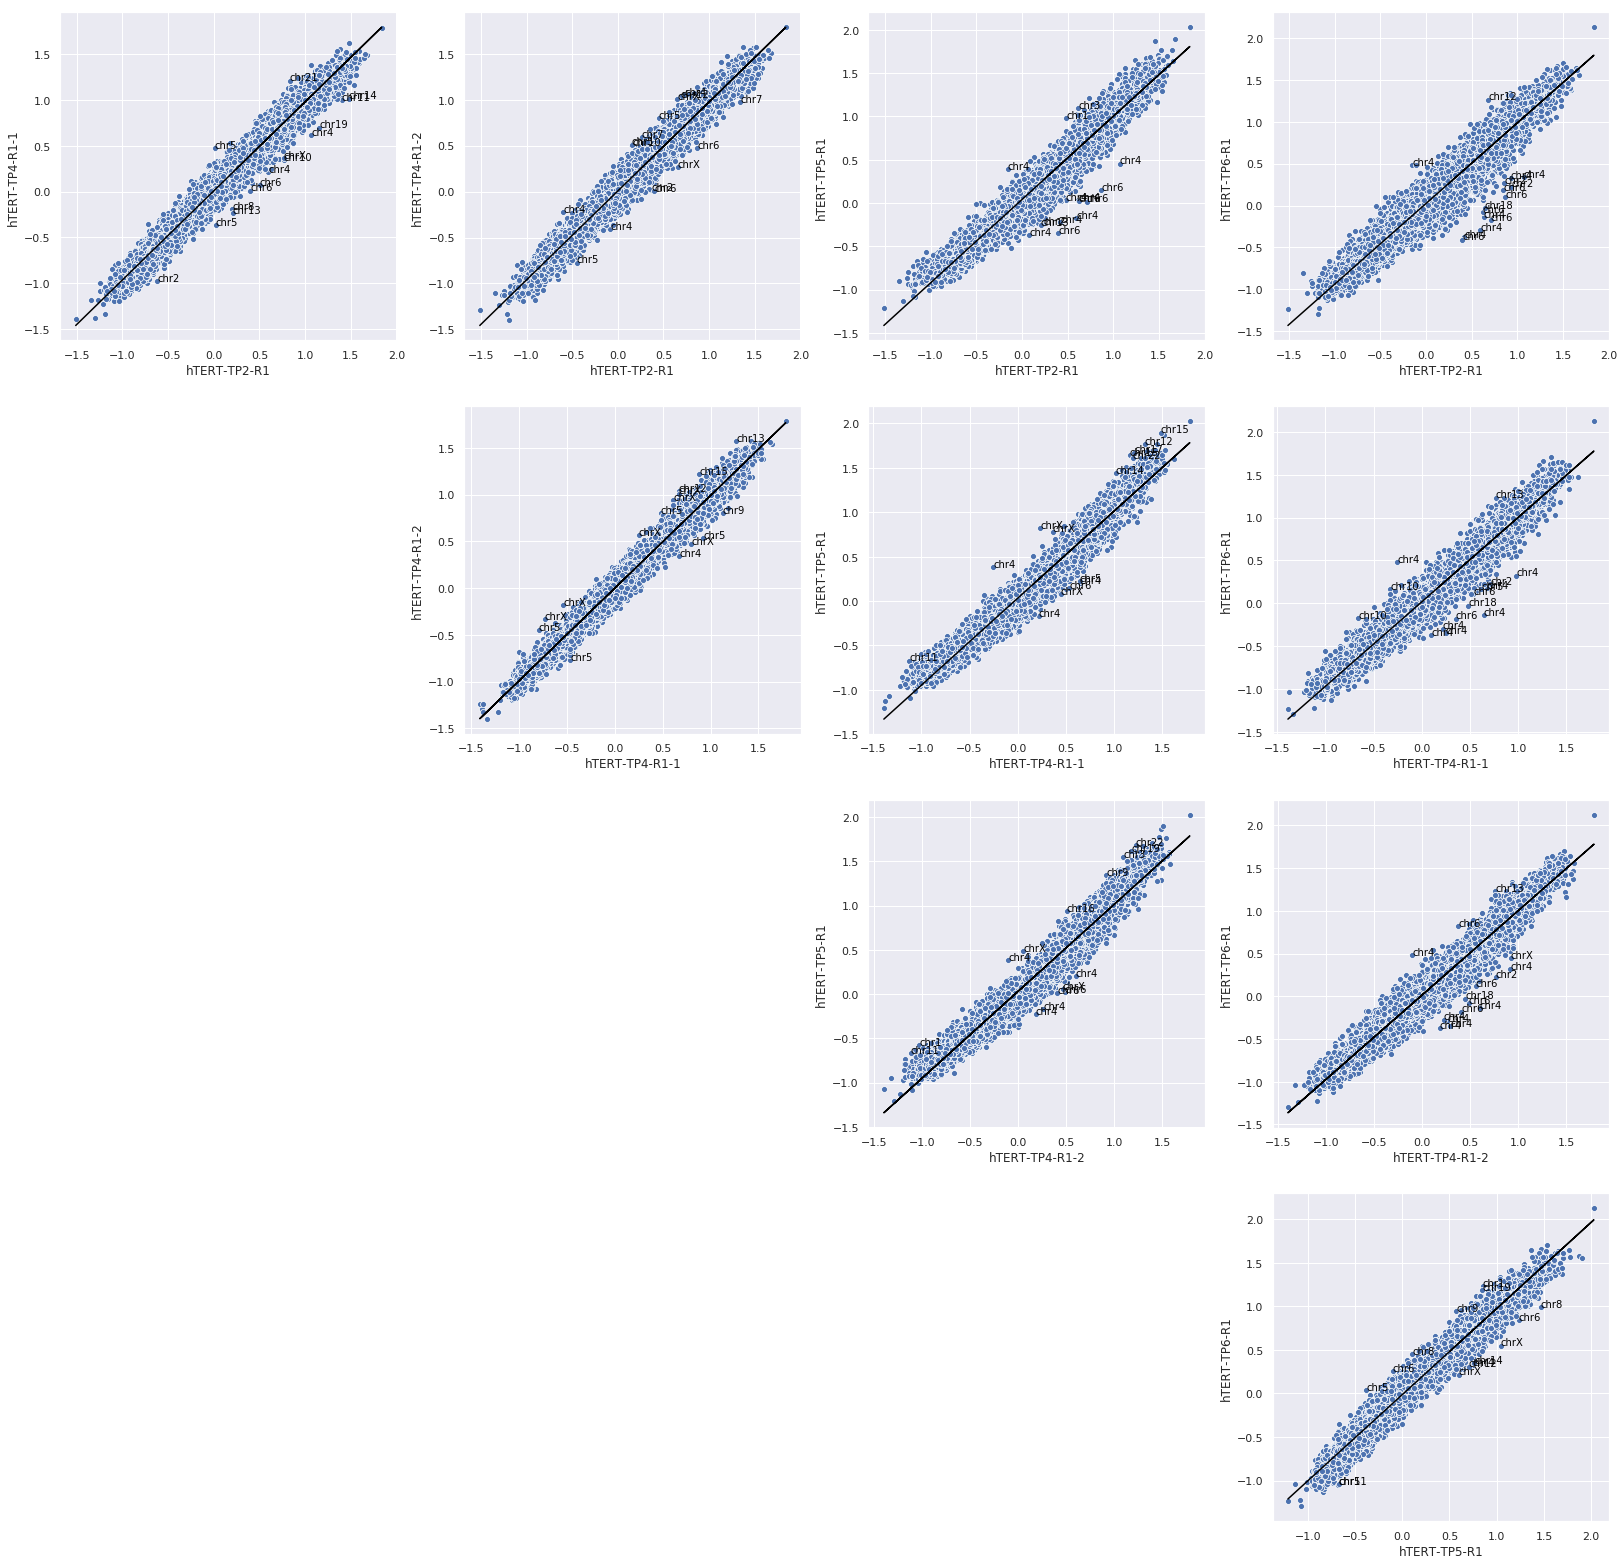

In [120]:
#hTERTS
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=5, ncols=5)
for i in range(5):
    for j in range(i+1,5):
        #linear reg
        regressor = LinearRegression()
        df=data1[['chrom','start','end',names_hTERT[i],names_hTERT[j]]].dropna()
        X=df[names_hTERT[i]].values.reshape(-1,1)
        y=df[names_hTERT[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
      
        #calculatin perpendicular distances
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c #predicted y values
        #sorteddf.to_csv(names_hTERT[i]+names_hTERT[j]+'.tsv',index=False,sep='\t')
        
        #plotting
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[i],y=names_hTERT[j],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')


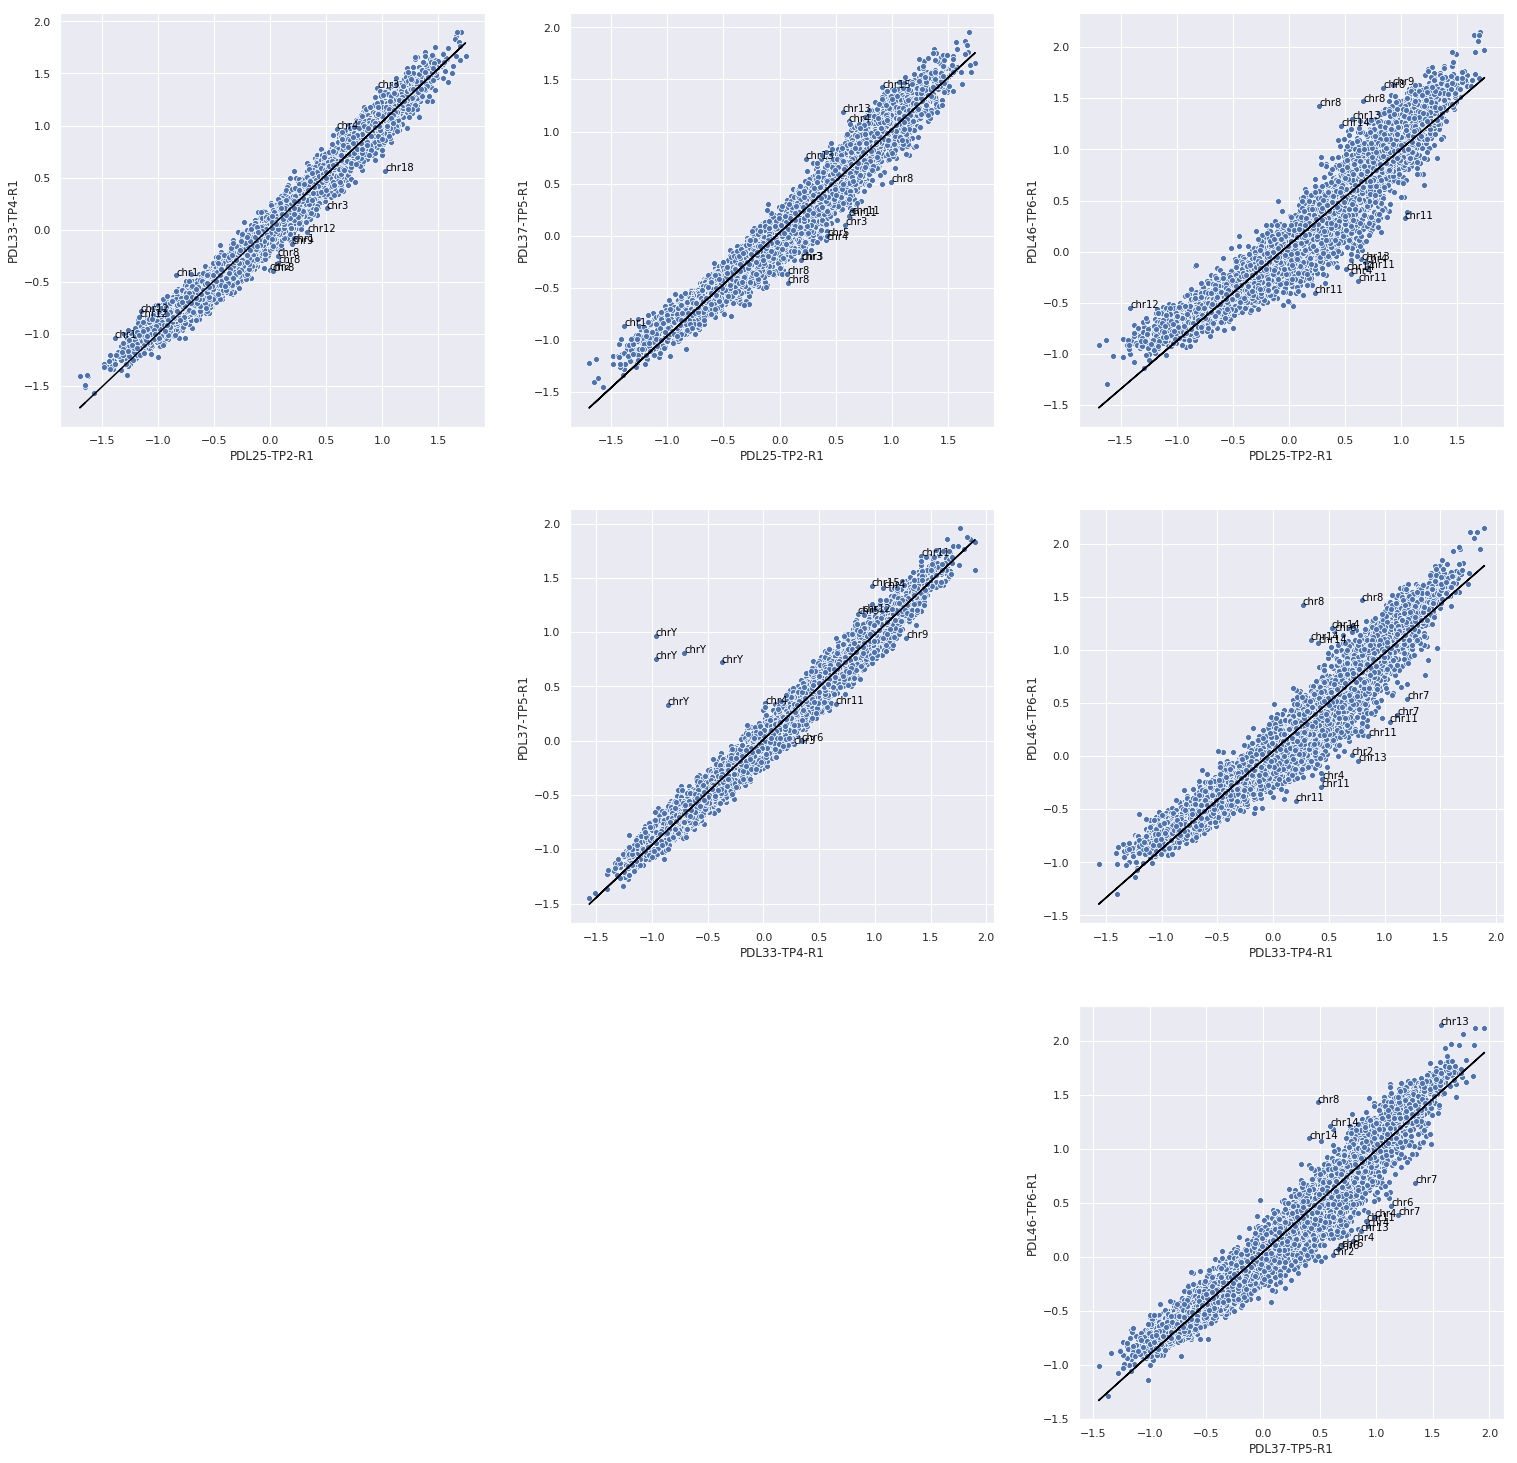

In [121]:
#PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=4)
for i in range(4):
    for j in range(i+1,4):
        df=data1[['chrom','start','end',names_PDL[i],names_PDL[j]]].dropna()
        X=df[names_PDL[i]].values.reshape(-1,1)
        y=df[names_PDL[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        #sorteddf.to_csv(names_PDL[i]+names_PDL[j]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_PDL[i],y=names_PDL[j],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')

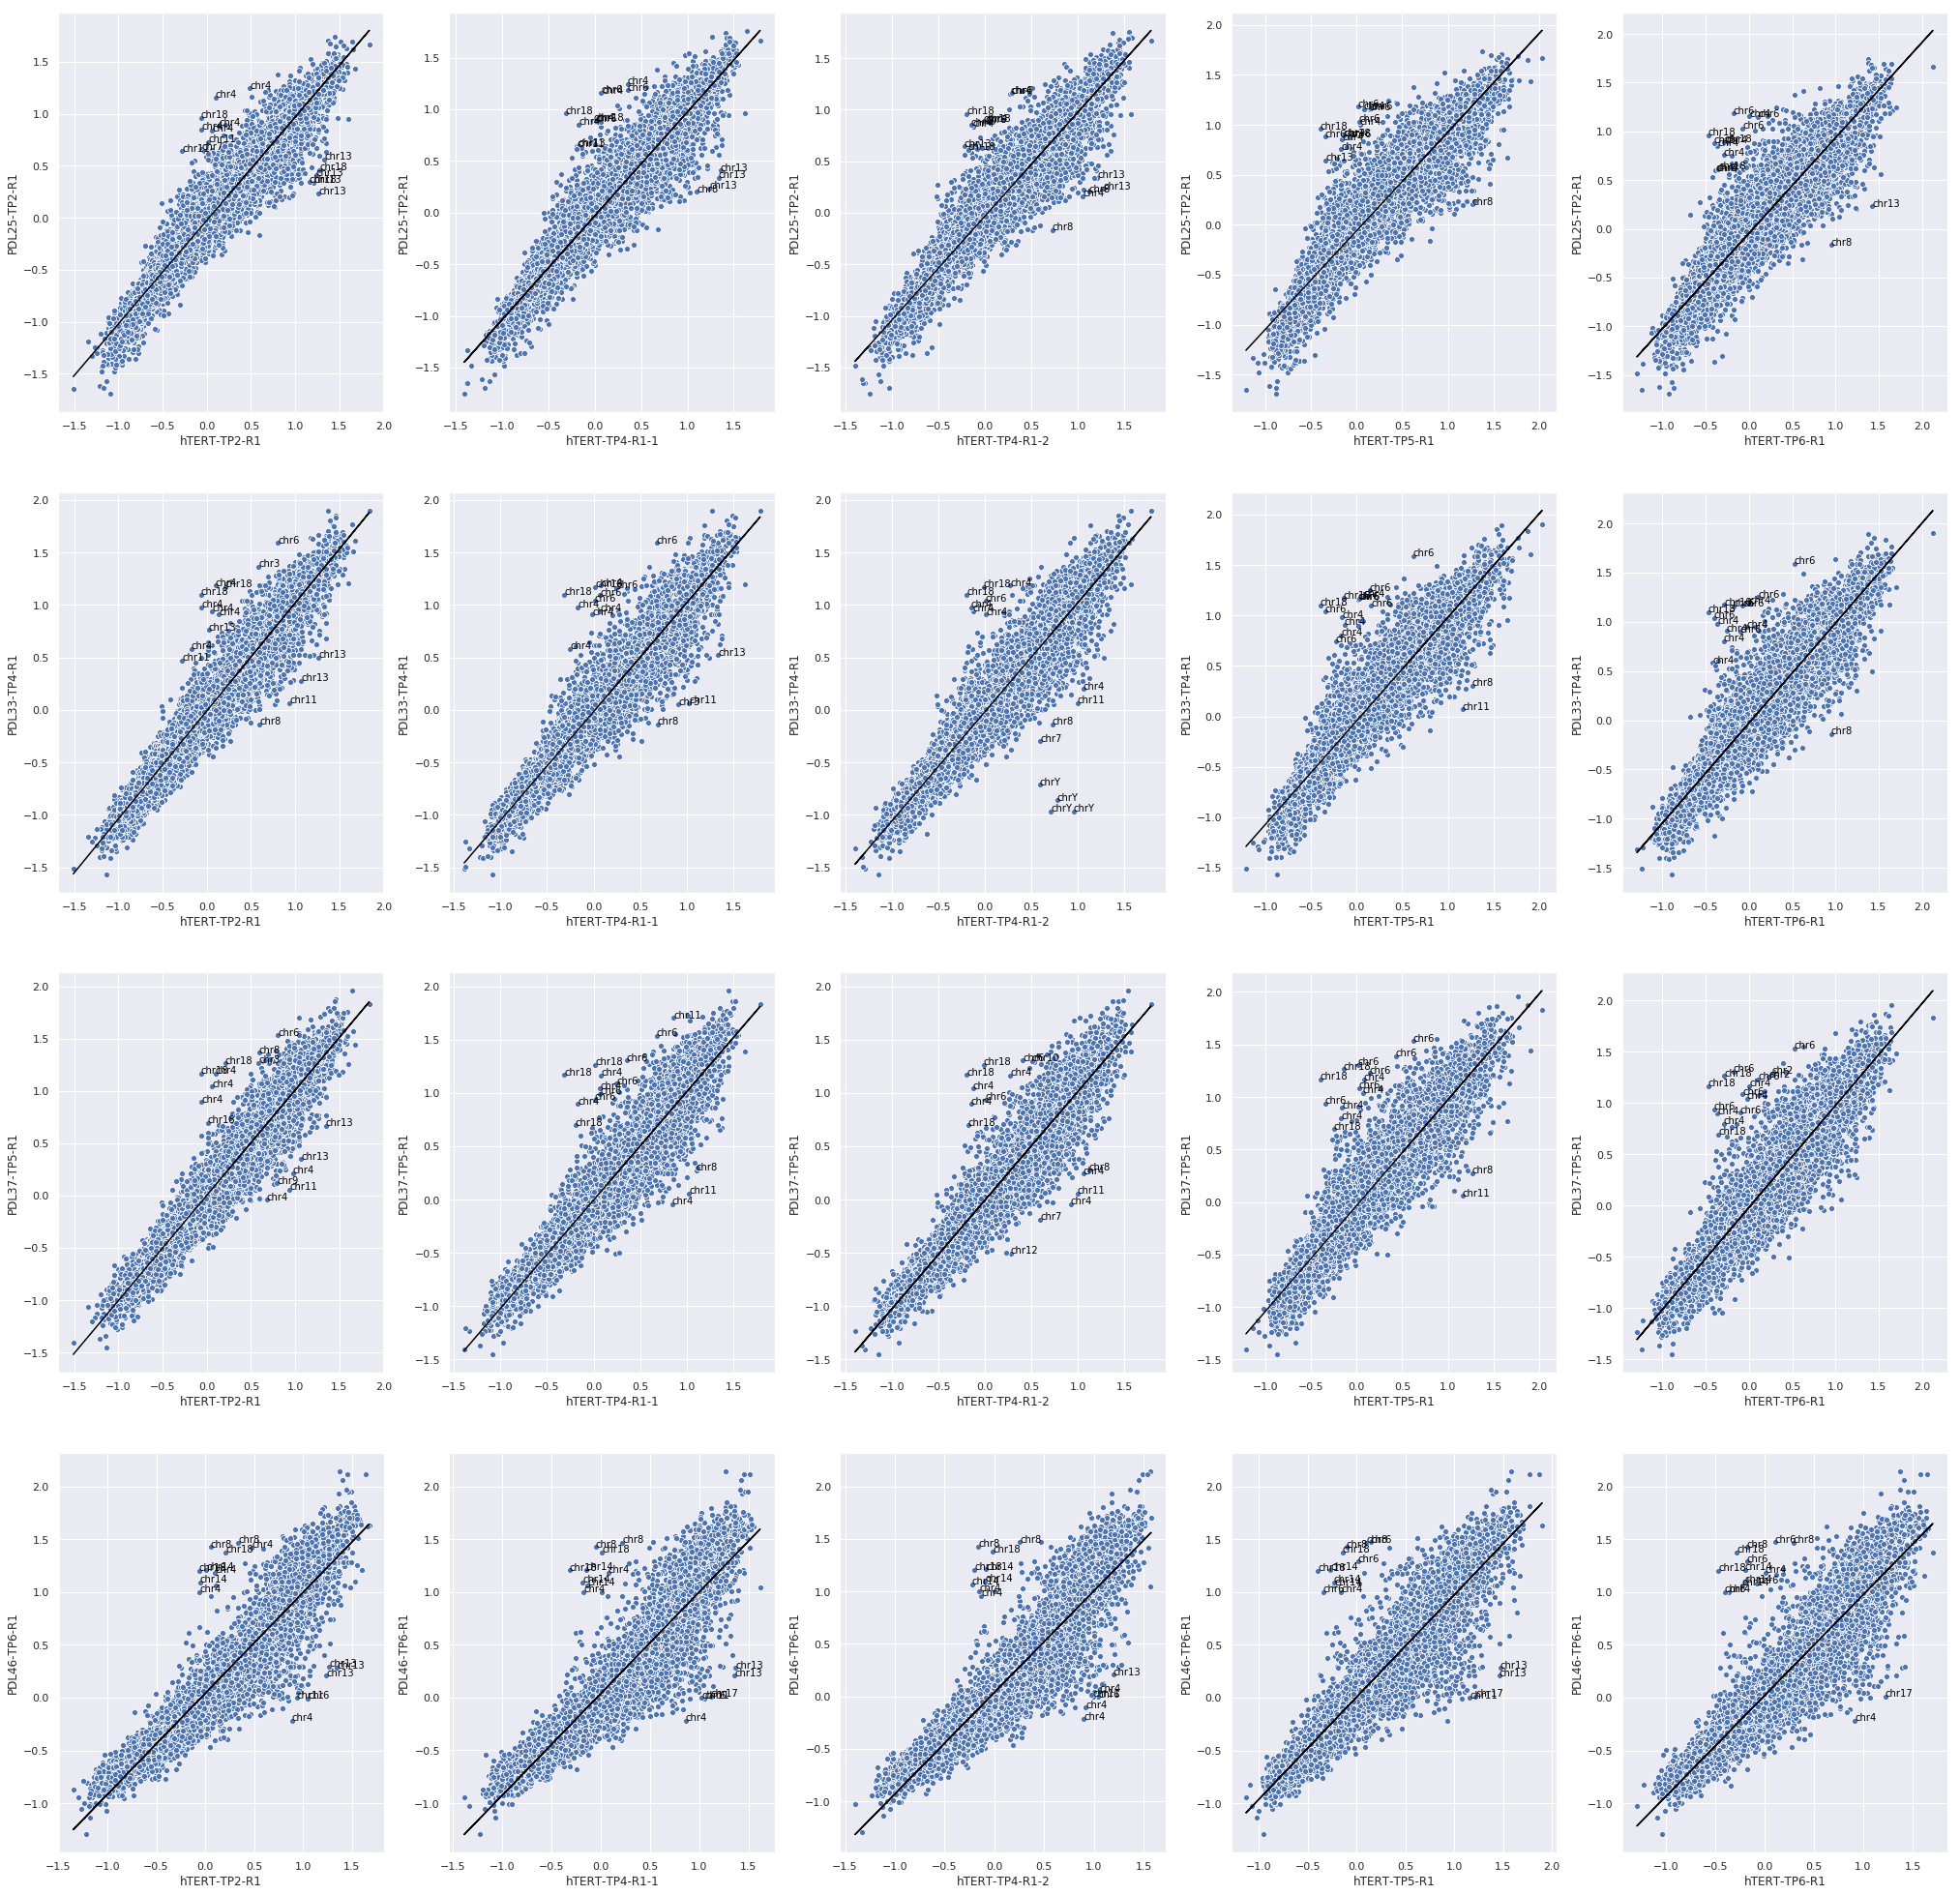

In [122]:
#hTERT-PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=5)
for i in range(4):
    for j in range(5):
        df=data1[['chrom','start','end',names_hTERT[j],names_PDL[i]]].dropna()
        X=df[names_hTERT[j]].values.reshape(-1,1)
        y=df[names_PDL[i]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        sorteddf.to_csv(names_hTERT[j]+names_PDL[i]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i,j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[j],y=names_PDL[i],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')

In [2]:
for i in range(5):
    for j in range(i+1,5):
        print("head -2000 Ranked/"+names_hTERT[i]+names_hTERT[j]+".tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > "+names_hTERT[i]+names_hTERT[j]+".bed")
    

head -2000 Ranked/hTERT-TP2-R1hTERT-TP4-R1-1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1hTERT-TP4-R1-1.bed
head -2000 Ranked/hTERT-TP2-R1hTERT-TP4-R1-2.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1hTERT-TP4-R1-2.bed
head -2000 Ranked/hTERT-TP2-R1hTERT-TP5-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1hTERT-TP5-R1.bed
head -2000 Ranked/hTERT-TP2-R1hTERT-TP6-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1hTERT-TP6-R1.bed
head -2000 Ranked/hTERT-TP4-R1-1hTERT-TP4-R1-2.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-1hTERT-TP4-R1-2.bed
head -2000 Ranked/hTERT-TP4-R1-1hTERT-TP5-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-1hTERT-TP5-R1.bed
head -2000 Ranked/hTERT-TP4-R1-1hTERT-TP6-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-1hTERT-TP6-R1.bed
head -2000 Ranked/hTERT-TP4-R1-2hTERT-TP5-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTE

In [3]:
for i in range(4):
    for j in range(i+1,4):
        print("head -2000 Ranked/"+names_PDL[i]+names_PDL[j]+".tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > "+names_PDL[i]+names_PDL[j]+".bed")        

head -2000 Ranked/PDL25-TP2-R1PDL33-TP4-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL25-TP2-R1PDL33-TP4-R1.bed
head -2000 Ranked/PDL25-TP2-R1PDL37-TP5-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL25-TP2-R1PDL37-TP5-R1.bed
head -2000 Ranked/PDL25-TP2-R1PDL46-TP6-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL25-TP2-R1PDL46-TP6-R1.bed
head -2000 Ranked/PDL33-TP4-R1PDL37-TP5-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL33-TP4-R1PDL37-TP5-R1.bed
head -2000 Ranked/PDL33-TP4-R1PDL46-TP6-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL33-TP4-R1PDL46-TP6-R1.bed
head -2000 Ranked/PDL37-TP5-R1PDL46-TP6-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > PDL37-TP5-R1PDL46-TP6-R1.bed


In [4]:
for i in range(4):
    for j in range(5):
        print("head -2000 Ranked/"+names_hTERT[j]+names_PDL[i]+".tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > "+names_hTERT[j]+names_PDL[i]+".bed")

head -2000 Ranked/hTERT-TP2-R1PDL25-TP2-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1PDL25-TP2-R1.bed
head -2000 Ranked/hTERT-TP4-R1-1PDL25-TP2-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-1PDL25-TP2-R1.bed
head -2000 Ranked/hTERT-TP4-R1-2PDL25-TP2-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-2PDL25-TP2-R1.bed
head -2000 Ranked/hTERT-TP5-R1PDL25-TP2-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP5-R1PDL25-TP2-R1.bed
head -2000 Ranked/hTERT-TP6-R1PDL25-TP2-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP6-R1PDL25-TP2-R1.bed
head -2000 Ranked/hTERT-TP2-R1PDL33-TP4-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP2-R1PDL33-TP4-R1.bed
head -2000 Ranked/hTERT-TP4-R1-1PDL33-TP4-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-1PDL33-TP4-R1.bed
head -2000 Ranked/hTERT-TP4-R1-2PDL33-TP4-R1.tsv | sort -k1,1 -k2,2n | bedtools merge -d 500000 > hTERT-TP4-R1-2P